# ASSIGNMENT 1
-----------------------

In [64]:
import numpy as np
import random
import matplotlib.pyplot as plt

## GGL
-------------

In [65]:
# Start with random seed:
random.seed(63418468732164812)
arr = []

# x0:
x = random.randint(1,10)
a = 16807
m = ((2**31)-1)
for i in range(1000000):
    # Compute GGL
    x = (a*x)%m
    arr.append(x)
arr = np.array(arr)    

# Normalizing the array
arr = arr/m

# Splitting the numbers in arr into 2 uniformly distributed sets X and Y such that X contains odd indexed
# numbers and X contains the even indexed numbers
X = arr[0:][::2]
Y = arr[1:][::2]

# Let's check that X and Y form a uniform distribution and that RNG works properly.
# For uniform distribution, the mean should be around (b+a)/2=(0+1)/2=0.5 and variance (b-a)^2/12=1/12=0.083.
print("Mean of X is {} and variance of X is {}.".format(np.round(X.mean(),3), np.round(X.var(), 3)))
print("Mean of Y is {} and variance of Y is {}.".format(np.round(Y.mean(),3), np.round(Y.var(), 3)))

Mean of X is 0.5 and variance of X is 0.083.
Mean of Y is 0.5 and variance of Y is 0.083.


So, the GGL works as it should.

(0.2, 0.201)

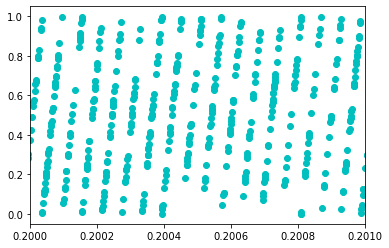

In [66]:
# plot X vs Y
plt.plot(X, Y, 'co')
Xa = 0.2
Xb = Xa + 10**-3
plt.xlim(Xa, Xb)

In the lecture slides it says that:

        LCGs have a serious drawback of correlations between
        consecutive numbers xi+1, xi+2, …, xi+d in the sequence.

        -> In d-dimensional space, the points given by these d numbers
           order on parallel hyperplanes. The average distance between
           these planes, whose dimension is d – 1, is constant. The
           smaller the number of these planes, the less uniform is the
           distribution. In Assignment 1: hyperplanes = lines."

GGL is a LCG. From the plot we can see these hyperplanes  clearly. The hyperplanes are the product of the correlations between cosecutive numbers in the array produces by the GGL.

## RAN3
-------------------

In [72]:
# Generate the initial set of seeds with the GGL generator (55 numbers required)
random.seed(1003014032104031)
arr = []
x = random.randint(1,20)
a = 16807
m = ((2**31)-1)
for i in range(55):
    # Compute RAN3
    x = (a*x)%m
    arr.append(x) 

# RAN3
m = 2**32
for i in range(55, 1000000):
    x = (arr[i-55]-arr[i-24])%m
    arr.append(x)
arr = np.array(arr)

# Normalizing the array
arr = arr/m

# Splitting the numbers in arr into 2 uniformly distributed sets X and Y such that X contains odd indexed
# numbers and X contains the even indexed numbers
X = arr[0:][::2]
Y = arr[1:][::2]

# Let's check that X and Y form a uniform distribution and that RNG works properly.
# For uniform distribution, the mean should be around (b+a)/2=(0+1)/2=0.5 and variance (b-a)^2/12=1/12=0.083.
print("Mean of X is {} and variance of X is {}.".format(np.round(X.mean(),3), np.round(X.var(), 3)))
print("Mean of Y is {} and variance of Y is {}.".format(np.round(Y.mean(),3), np.round(Y.var(), 3)))

Mean of X is 0.5 and variance of X is 0.083.
Mean of Y is 0.5 and variance of Y is 0.083.


So, the RAN3 works as it should.

(0.2, 0.201)

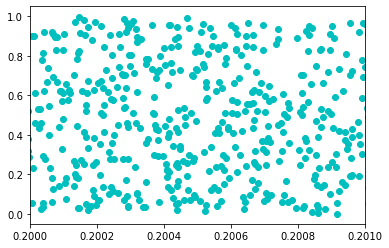

In [73]:
# plot X vs Y
plt.plot(X, Y, 'co')
Xa = 0.2
Xb = Xa + 10**-3
plt.xlim(Xa, Xb)

No hyperplanes visible in RAN3 plot. Also, the points are randomly and pretty sparsely distributed in the 2-dimensional space. This is because LFGs (like RAN3) don't suffer from similar correlations like LCGs (e.g. GGL) do. LFGs are actually generalizations of LGCs with increased period. Because of the longer period, the points do not form the hyperplanes and are more rendomly distributed.

## Mersenne Twister
-------------------

In [74]:
random.seed(200)
arr = []
m = 2**19937 - 1

# Mersenne Twister
m = 2**32
for i in range(10000000):
    x = random.random()
    arr.append(x)
arr = np.array(arr)

# Now, there is no need to normalize the values as Mersenne twister automatically produces values between 0 and 1.
arr = arr

# Splitting the numbers in arr into 2 uniformly distributed sets X and Y such that X contains odd indexed
# numbers and X contains the even indexed numbers
X = arr[0:][::2]
Y = arr[1:][::2]

# Let's check that X and Y form a uniform distribution and that RNG works properly.
# For uniform distribution, the mean should be around (b+a)/2=(0+1)/2=0.5 and variance (b-a)^2/12=1/12=0.083.
print("Mean of X is {} and variance of X is {}.".format(np.round(X.mean(),3), np.round(X.var(), 3)))
print("Mean of Y is {} and variance of Y is {}.".format(np.round(Y.mean(),3), np.round(Y.var(), 3)))

Mean of X is 0.5 and variance of X is 0.083.
Mean of Y is 0.5 and variance of Y is 0.083.


So, the Mersenne Twister works as it should.

(0.2, 0.201)

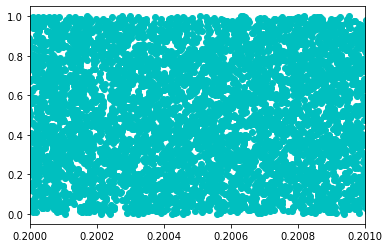

In [75]:
# plot X vs Y
plt.plot(X, Y, 'co')
Xa = 0.2
Xb = Xa + 10**-3
plt.xlim(Xa, Xb)

No hyperplanes visible and the random points are distributed pretty much evenly in the graph with very close intervals compared to RAN3.

This is because Mersenne Twister is a computationally heavy RNG and it has a long period of 2^19937 - 1 between the 53-bit precision floats it produces.